# **ETL**

    1. Importamos Librerías

In [2]:
#Importamos Librerías
import pandas as pd                             # Importamos Pandas
from datetime import datetime                   # Iportar datetime
from pandas_datareader import data as pdr       # Importar pandas_datareader
import yfinance as yf                           # Importar yfinance

    2. Importamos la Información de SP500

In [3]:
# Scrapear la información de las S&P500
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'       # Asignamos el nombre de la URL a Scrapear
tables = pd.read_html(url)                                              # Extraemos las tablas de la URL
SP500 = tables[0]                                                       # seleccionar la primera tabla encontrada en la página
SP500.head(1)                                                           # Visualizar la Data

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902


In [4]:
# Concatenamos la data para ser digerida directamente por la Librería yfinance
SP500_Symbol = ', '.join(SP500['Symbol'])       # Realizar Join a los datos de la columna  'Symbol' y separar por ","
SP500_Symbol                                    # Visualizamos la cadena de texto

'MMM, AOS, ABT, ABBV, ACN, ATVI, ADM, ADBE, ADP, AAP, AES, AFL, A, APD, AKAM, ALK, ALB, ARE, ALGN, ALLE, LNT, ALL, GOOGL, GOOG, MO, AMZN, AMCR, AMD, AEE, AAL, AEP, AXP, AIG, AMT, AWK, AMP, ABC, AME, AMGN, APH, ADI, ANSS, AON, APA, AAPL, AMAT, APTV, ACGL, ANET, AJG, AIZ, T, ATO, ADSK, AZO, AVB, AVY, BKR, BALL, BAC, BBWI, BAX, BDX, WRB, BRK.B, BBY, BIO, TECH, BIIB, BLK, BK, BA, BKNG, BWA, BXP, BSX, BMY, AVGO, BR, BRO, BF.B, CHRW, CDNS, CZR, CPT, CPB, COF, CAH, KMX, CCL, CARR, CTLT, CAT, CBOE, CBRE, CDW, CE, CNC, CNP, CDAY, CF, CRL, SCHW, CHTR, CVX, CMG, CB, CHD, CI, CINF, CTAS, CSCO, C, CFG, CLX, CME, CMS, KO, CTSH, CL, CMCSA, CMA, CAG, COP, ED, STZ, CEG, COO, CPRT, GLW, CTVA, CSGP, COST, CTRA, CCI, CSX, CMI, CVS, DHI, DHR, DRI, DVA, DE, DAL, XRAY, DVN, DXCM, FANG, DLR, DFS, DISH, DIS, DG, DLTR, D, DPZ, DOV, DOW, DTE, DUK, DD, DXC, EMN, ETN, EBAY, ECL, EIX, EW, EA, ELV, LLY, EMR, ENPH, ETR, EOG, EPAM, EQT, EFX, EQIX, EQR, ESS, EL, ETSY, RE, EVRG, ES, EXC, EXPE, EXPD, EXR, XOM, FFIV, FDS,

    3. Generamos un Dataframe con las acciones del S&P500

In [5]:
# Descargamos el Dataframe
today = datetime.today().date()                                             # obtener la fecha actual
today_pandas = pd.to_datetime(today)                                        # convertir la fecha en un objeto de fecha de Pandas
hoy=today_pandas.strftime('%Y-%m-%d')                                       # imprimir la fecha de hoy en formato YYYY-MM-DD
yf.pdr_override()                                                           # Esta función guarda toda la información
data = pdr.get_data_yahoo(SP500_Symbol, start="1990-01-01", end=hoy)        # Scrapear la información y almacenar en un DataFrame

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted


In [6]:
# Generamos una copia del DataFrame original y cambiamos el órden de su cabecera
data_aux=data.copy()                                            # Crear una copia
data_aux.columns = data_aux.columns.swaplevel(0, 1)             # Invertimos el orden de las cabeceras multi-nivel

In [7]:
# Convertimos la Data en Diccionario
#data_Symbol_list=[]                                                             # Crear una lista vacía
#Symbol_list=[]                                                                  # Crear otra lista vacía
#for Symbol in SP500['Symbol']:                                                  # Recorrer el SP500['Symbol'] y extraer la data según la compañía
#    data_Symbol=pd.DataFrame(data_aux.loc[:, (Symbol)])
#    data_Symbol_list.append(data_Symbol)
#    Symbol_list.append(Symbol)

#data_Symbol_dic = {Symbol_list[i]:                                              # Guardar la Data dentro del diccionario data_Symbol_dic
#                   data_Symbol_list[i] for i in range(len(Symbol_list))}

In [8]:
# Convertir Date en una columna
data.reset_index(inplace=True)                              # Convertir el índice en una columna
data['Date'] = pd.to_datetime(data['Date'])                 # Convertir la columna de fecha a formato datetime
data_aux.reset_index(inplace=True)                          # Convertir el índice en una columna
data_aux['Date'] = pd.to_datetime(data_aux['Date'])         # Convertir la columna de fecha a formato datetime

C:\Users\user\AppData\Local\Temp\ipykernel_19056\3968993543.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.reset_index(inplace=True)                              # Convertir el índice en una columna


In [9]:
#Visualizamos las dimensiones del Dataframe resultante
print(data.shape)               # Imprimimos Data
print(data_aux.shape)           # Imprimimos Data_Aux

(8353, 3019)
(8353, 3019)


# **EDA**

    1. IMPORTACIÓN DE LIBRERÍAS

In [10]:
#Importamos Librerías necesarias
import pandas as pd                 #Importamos Pandas
import numpy as np                  #Importamos numpy
import matplotlib.pyplot as plt     #Importamos matplotlib
import seaborn as sns               #Importamos seaborn

    2. VISUALIZAMOS LA DATA

In [11]:
data.head()             # Visualizamos la data

Date Adj Close                                                ...  \
                     A AAL AAP      AAPL ABBV ABC       ABT ACGL ACN  ...   
0 1990-01-02       NaN NaN NaN  0.264482  NaN NaN  1.855249  NaN NaN  ...   
1 1990-01-03       NaN NaN NaN  0.266257  NaN NaN  1.861946  NaN NaN  ...   
2 1990-01-04       NaN NaN NaN  0.267145  NaN NaN  1.858598  NaN NaN  ...   
3 1990-01-05       NaN NaN NaN  0.268033  NaN NaN  1.838504  NaN NaN  ...   
4 1990-01-08       NaN NaN NaN  0.269808  NaN NaN  1.847928  NaN NaN  ...   

  Volume                                                       
    WYNN     XEL      XOM   XRAY XYL YUM ZBH ZBRA    ZION ZTS  
0    NaN  247200  5326000  18000 NaN NaN NaN  NaN   53600 NaN  
1    NaN  126800  4980400  79200 NaN NaN NaN  NaN  111200 NaN  
2    NaN  204200  6013200  25200 NaN NaN NaN  NaN    1600 NaN  
3    NaN  144800  3854800  92400 NaN NaN NaN  NaN       0 NaN  
4    NaN  189000  4302000  98400 NaN NaN NaN  NaN    1600 NaN  

[5 rows x 3019 columns]

    3. LIMPIEZA DE DATOS

        3.1. Gestión de Nulos

In [12]:
# Visualizar los nulos del DataFrame 'Volume'
df_nulos = data.isna()                                                  
nulos_volumen=pd.DataFrame(df_nulos.loc[:,'Volume'])
print(nulos_volumen.shape," Volume")

# Visualizar los nulos del DataFrame 'Volume'
nulos_volumen=pd.DataFrame(df_nulos.loc[:,'Low'])
print(nulos_volumen.shape," Low")

# Visualizar los nulos del DataFrame 'Volume'
nulos_volumen=pd.DataFrame(df_nulos.loc[:,'High'])
print(nulos_volumen.shape," High")

# Visualizar los nulos del DataFrame 'Volume'
nulos_volumen=pd.DataFrame(df_nulos.loc[:,'Close'])
print(nulos_volumen.shape," Close")

# Visualizar los nulos del DataFrame 'Volume'
nulos_volumen=pd.DataFrame(df_nulos.loc[:,'Open'])
print(nulos_volumen.shape," Open")

(8353, 503)  Volume
(8353, 503)  Low
(8353, 503)  High
(8353, 503)  Close
(8353, 503)  Open


Text(0, 0.5, 'Valores Nulos')

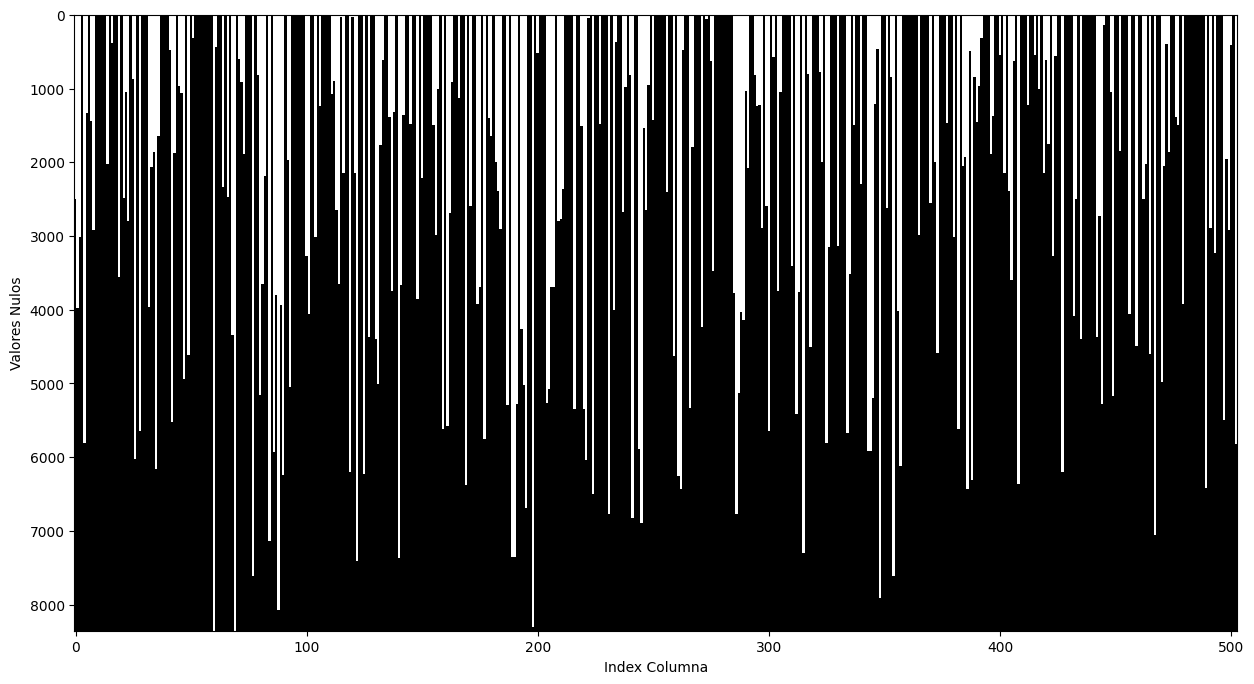

In [13]:
#Graficamos los nulos por empresa
plt.figure(figsize=(15,8))                              # Etablecer las dimensiones de la Figura
plt.imshow(nulos_volumen,aspect="auto",                 # Definir la información y la vista
           interpolation="nearest",cmap="gray")         # Definir la interpolación y el color
plt.xlabel("Index Columna")                             # Definir el nombre de X
plt.ylabel("Valores Nulos")                             # Definir el nombre para Y

                >>>Opinión:<<<
                Para Realizar un correcto análisis de variables y de empresas se tomarán compañías con igual cantidad de nulos o sin nulos.
                De esta manera las estadísticas realizadas tendrán congruencia desde el día 0.

<AxesSubplot: title={'center': 'Porcentaje de Valores Faltantes por Compañía'}, ylabel='Relación de Valores perdidos'>

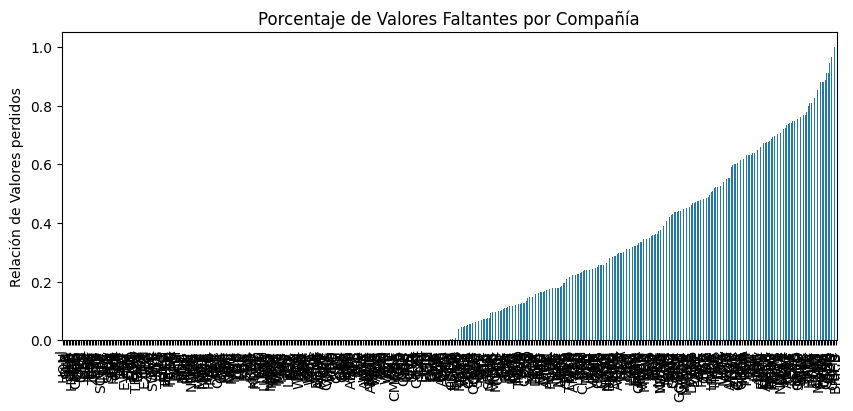

In [42]:
# Graficamos los nulos por porcentaje
nulos_volumen.mean().sort_values().plot(                            # Definir la data de alimentación
    kind="bar", figsize=(10,4),                                     # Definir las dimensiones
    title="Porcentaje de Valores Faltantes por Compañía",           # Definir el títulos
    ylabel="Relación de Valores perdidos")                          # Definir el nombre del eje Y

                >>>Opinión:<<<
                Más del 70% de empresas tiene más de 22 años de presencia ininterrumpida en la bolsa.
                Por lo tanto dentro de nuestro análisis valorizaremos a esas empresa para realizar inversión.

        3.2. Gestión de Duplicados

In [15]:
# Contar filas duplicadas
duplicados=data[data.duplicated()]      # Medir los duplicados
duplicados.shape                        # Contar duplicados

(0, 3019)

                >>>Opinión:<<<
                Al no existir valores duplicados se trabajará con la data íntegra

        3.3. Gestión de Outliers

In [16]:
#Generamos un ciclo iterativo para graficar las 500 empresas en todos sus estados
#numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
#for col in numeric_cols:
#    data.boxplot(column=[col],figsize=(5, 0.5),vert=False)
#    plt.show()

# No se ha ejecutado para evitar explotar el sistema, debido a que son cerca de 3000 gráficos


                >>>Opinión:<<<
                No se realizó el análisis de outliers debido a que es data oficial por lo tanto será considerada de manera íntegra

    4. SELECCIÓN DE NICHO

**`Premisa:`** En base a la experiencia del analista y las sugerencias realizadas por el inversionista se dividirá la inversión en 2 empresas del mismo sector: una de alto riesgo y otra de bajo riesgo.

        4.1. Selección del Sector

In [17]:
# Agrupamos la data por Año-Mes por valor de ciere  
data_close=pd.DataFrame(data.loc[:,'Close'])                    # Filtramos la Data en base al valor de cierre para hallar tendencias
data_close['Date']=data.loc[:,'Date']                           # Incluimos la columna Date
data_close_anio_mes = data_close.groupby(
    data_close['Date'].dt.strftime('%Y-%m')).mean()             # Agrupar la data por Año-Mes

C:\Users\user\AppData\Local\Temp\ipykernel_19056\3335449032.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_close['Date'].dt.strftime('%Y-%m')).mean()             # Agrupar la data por Año-Mes


In [18]:
#Filtrar los valores que tienen la columna "Symbol" y tienen un valor en la columna "GICS Sector" en SP500
Industrials = SP500.loc[(SP500['GICS Sector'] == 'Industrials') & (SP500['Symbol'].notnull())]                          # 'Symbols' con 'Industrials'
Health_Care = SP500.loc[(SP500['GICS Sector'] == 'Health Care') & (SP500['Symbol'].notnull())]                          # 'Symbols' con 'Health Care'
Information_Technology = SP500.loc[(SP500['GICS Sector'] == 'Information Technology') & (SP500['Symbol'].notnull())]    # 'Symbols' con 'Information Technology'
Communication_Services = SP500.loc[(SP500['GICS Sector'] == 'Communication Services') & (SP500['Symbol'].notnull())]    # 'Symbols' con 'Communication Services'
Consumer_Staples = SP500.loc[(SP500['GICS Sector'] == 'Consumer Staples') & (SP500['Symbol'].notnull())]                # 'Symbols' con 'Consumer Staples'
Consumer_Discretionary = SP500.loc[(SP500['GICS Sector'] == 'Consumer Discretionary') & (SP500['Symbol'].notnull())]    # 'Symbols' con 'Consumer Discretionary'
Utilities = SP500.loc[(SP500['GICS Sector'] == 'Utilities') & (SP500['Symbol'].notnull())]                              # 'Symbols' con 'Utilities'
Financials = SP500.loc[(SP500['GICS Sector'] == 'Financials') & (SP500['Symbol'].notnull())]                            # 'Symbols' con 'Financials'
Materials = SP500.loc[(SP500['GICS Sector'] == 'Materials') & (SP500['Symbol'].notnull())]                              # 'Symbols' con 'Materials'
Real_Estate = SP500.loc[(SP500['GICS Sector'] == 'Real Estate') & (SP500['Symbol'].notnull())]                          # 'Symbols' con 'Real Estate'
Energy = SP500.loc[(SP500['GICS Sector'] == 'Energy') & (SP500['Symbol'].notnull())]                                    # 'Symbols' con 'Energy'


In [19]:
# Creamos los dataframes con los promedio por cada Cagoría
Industrials_promedio=pd.DataFrame(data_close_anio_mes[Industrials["Symbol"]].mean(axis=1), columns=['Industrials'])
Health_Care_promedio=pd.DataFrame(data_close_anio_mes[Health_Care["Symbol"]].mean(axis=1), columns=['Health_Care'])
Information_Technology_promedio=pd.DataFrame(data_close_anio_mes[Information_Technology["Symbol"]].mean(axis=1), columns=['Information_Technology'])
Communication_Services_promedio=pd.DataFrame(data_close_anio_mes[Communication_Services["Symbol"]].mean(axis=1), columns=['Communication_Services'])
Consumer_Staples_promedio=pd.DataFrame(data_close_anio_mes[Consumer_Staples["Symbol"]].mean(axis=1), columns=['Consumer_Staples'])
Consumer_Discretionary_promedio=pd.DataFrame(data_close_anio_mes[Consumer_Discretionary["Symbol"]].mean(axis=1), columns=['Consumer_Discretionary'])
Utilities_promedio=pd.DataFrame(data_close_anio_mes[Utilities["Symbol"]].mean(axis=1), columns=['Utilities'])
Financials_promedio=pd.DataFrame(data_close_anio_mes[Financials["Symbol"]].mean(axis=1), columns=['Financials'])
Materials_promedio=pd.DataFrame(data_close_anio_mes[Materials["Symbol"]].mean(axis=1), columns=['Materials'])
Real_Estate_promedio=pd.DataFrame(data_close_anio_mes[Real_Estate["Symbol"]].mean(axis=1), columns=['Real_Estate'])
Energy_promedio=pd.DataFrame(data_close_anio_mes[Energy["Symbol"]].mean(axis=1), columns=['Energy'])

# Concatenamos las columnas mediante la fecha
data_close_promedio=pd.concat([Industrials_promedio, 
                                    Health_Care_promedio, 
                                    Information_Technology_promedio, 
                                    Communication_Services_promedio, 
                                    Consumer_Staples_promedio, 
                                    Consumer_Discretionary_promedio, 
                                    Utilities_promedio, 
                                    Financials_promedio, 
                                    Materials_promedio, 
                                    Real_Estate_promedio, 
                                    Energy_promedio], axis=1)

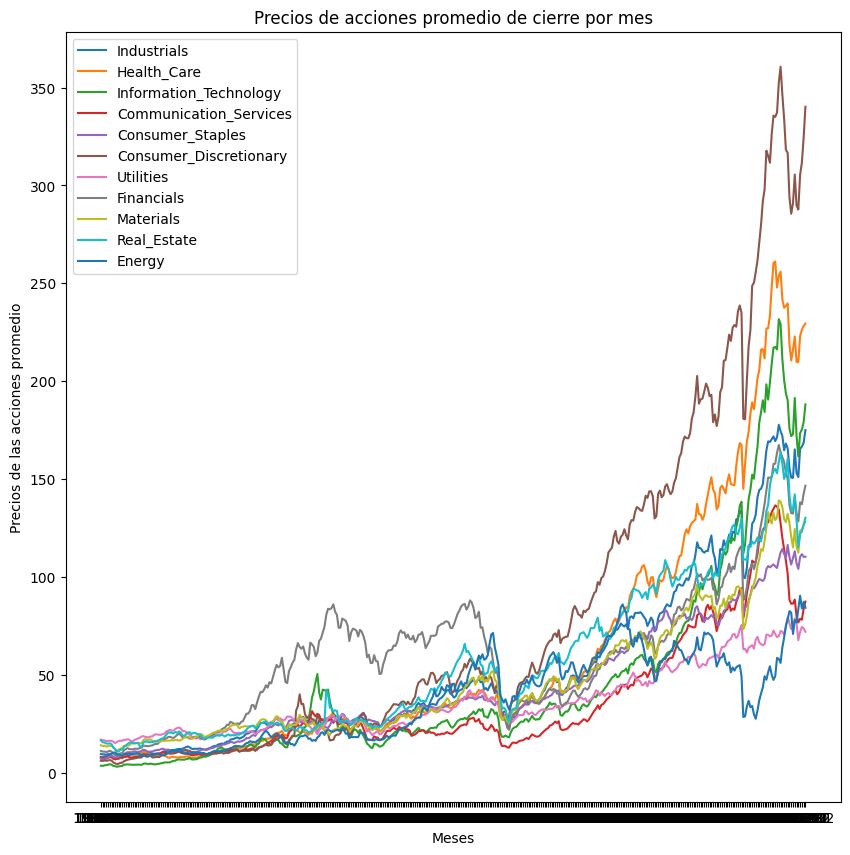

In [43]:
# Definir Variable X y reindexamos a Date para convertirlo en Columna
x = data_close_promedio.reset_index()['Date']

# Definir variables y para cada Categoría
y1 = data_close_promedio['Industrials']
y2 = data_close_promedio['Health_Care']
y3 = data_close_promedio['Information_Technology']
y4 = data_close_promedio['Communication_Services']
y5 = data_close_promedio['Consumer_Staples']
y6 = data_close_promedio['Consumer_Discretionary']
y7 = data_close_promedio['Utilities']
y8 = data_close_promedio['Financials']
y9 = data_close_promedio['Materials']
y10 = data_close_promedio['Real_Estate']
y11 = data_close_promedio['Energy']

# Definir dimensiones de gráfico
fig, ax = plt.subplots(figsize=(10, 10))         

# Agregar nombre a las líneas
ax.plot(x, y1, label='Industrials')
ax.plot(x, y2, label='Health_Care')
ax.plot(x, y3, label='Information_Technology')
ax.plot(x, y4, label='Communication_Services')
ax.plot(x, y5, label='Consumer_Staples')
ax.plot(x, y6, label='Consumer_Discretionary')
ax.plot(x, y7, label='Utilities')
ax.plot(x, y8, label='Financials')
ax.plot(x, y9, label='Materials')
ax.plot(x, y10, label='Real_Estate')
ax.plot(x, y11, label='Energy')

# Configurar Título, Xlabel, Ylabel y Legend
ax.set_title('Precios de acciones promedio de cierre por mes')
ax.set_xlabel('Meses')
ax.set_ylabel('Precios de las acciones promedio')
ax.legend()

# Mostrar el gráfico
plt.show()


                >>>Opinión:<<<
                La Categoría con mejor crecimiento es Consumer Discretionary, seguido de Health Care e information Tecnology.

In [21]:
# Realizar la misma visualización anterior pero con una vista Anual
data_close_anio = data_close.groupby(data_close['Date'].dt.strftime('%Y')).mean()     # Agrupar la data por año

# Crear los dataframes con los promedio
Industrials_promedio=pd.DataFrame(data_close_anio[Industrials["Symbol"]].mean(axis=1), columns=['Industrials'])
Health_Care_promedio=pd.DataFrame(data_close_anio[Health_Care["Symbol"]].mean(axis=1), columns=['Health_Care'])
Information_Technology_promedio=pd.DataFrame(data_close_anio[Information_Technology["Symbol"]].mean(axis=1), columns=['Information_Technology'])
Communication_Services_promedio=pd.DataFrame(data_close_anio[Communication_Services["Symbol"]].mean(axis=1), columns=['Communication_Services'])
Consumer_Staples_promedio=pd.DataFrame(data_close_anio[Consumer_Staples["Symbol"]].mean(axis=1), columns=['Consumer_Staples'])
Consumer_Discretionary_promedio=pd.DataFrame(data_close_anio[Consumer_Discretionary["Symbol"]].mean(axis=1), columns=['Consumer_Discretionary'])
Utilities_promedio=pd.DataFrame(data_close_anio[Utilities["Symbol"]].mean(axis=1), columns=['Utilities'])
Financials_promedio=pd.DataFrame(data_close_anio[Financials["Symbol"]].mean(axis=1), columns=['Financials'])
Materials_promedio=pd.DataFrame(data_close_anio[Materials["Symbol"]].mean(axis=1), columns=['Materials'])
Real_Estate_promedio=pd.DataFrame(data_close_anio[Real_Estate["Symbol"]].mean(axis=1), columns=['Real_Estate'])
Energy_promedio=pd.DataFrame(data_close_anio[Energy["Symbol"]].mean(axis=1), columns=['Energy'])

# Unimos los dataframes con los promedios en base a la columna fecha
data_close_promedio_anual=pd.concat([Industrials_promedio, 
                                    Health_Care_promedio, 
                                    Information_Technology_promedio, 
                                    Communication_Services_promedio, 
                                    Consumer_Staples_promedio, 
                                    Consumer_Discretionary_promedio, 
                                    Utilities_promedio, 
                                    Financials_promedio, 
                                    Materials_promedio, 
                                    Real_Estate_promedio, 
                                    Energy_promedio], axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_19056\2720428027.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_close_anio = data_close.groupby(data_close['Date'].dt.strftime('%Y')).mean()     # Agrupar la data por año


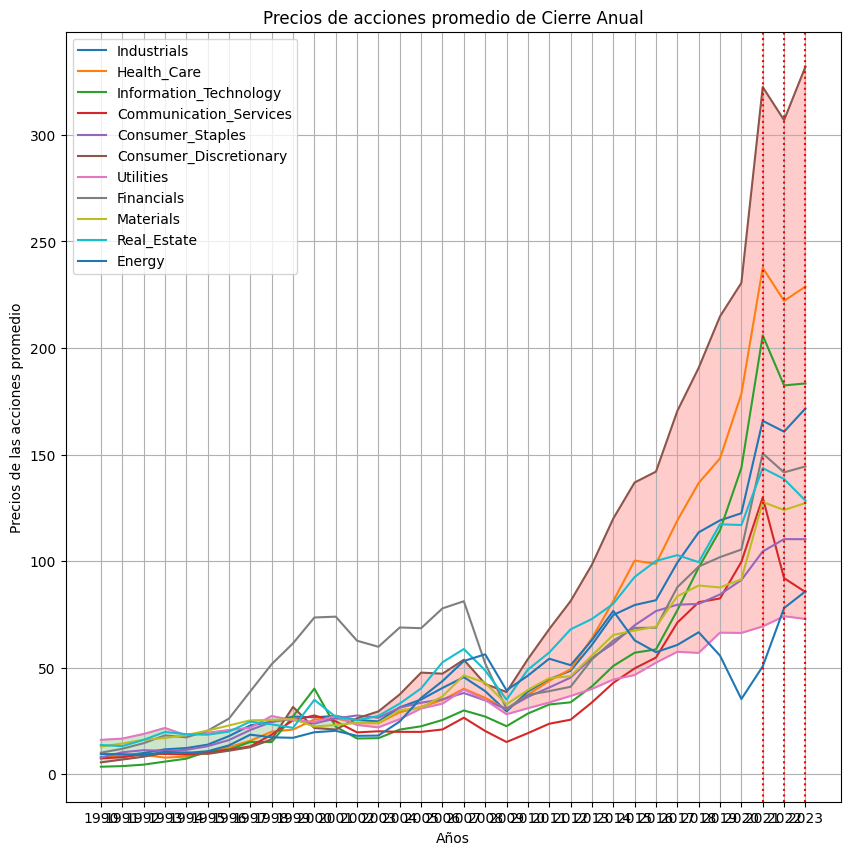

In [44]:
# Definir las variables
x = data_close_promedio_anual.reset_index()['Date']
y1 = data_close_promedio_anual['Industrials']
y2 = data_close_promedio_anual['Health_Care']
y3 = data_close_promedio_anual['Information_Technology']
y4 = data_close_promedio_anual['Communication_Services']
y5 = data_close_promedio_anual['Consumer_Staples']
y6 = data_close_promedio_anual['Consumer_Discretionary']
y7 = data_close_promedio_anual['Utilities']
y8 = data_close_promedio_anual['Financials']
y9 = data_close_promedio_anual['Materials']
y10 = data_close_promedio_anual['Real_Estate']
y11 = data_close_promedio_anual['Energy']


# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x, y1, label='Industrials')
ax.plot(x, y2, label='Health_Care')
ax.plot(x, y3, label='Information_Technology')
ax.plot(x, y4, label='Communication_Services')
ax.plot(x, y5, label='Consumer_Staples')
ax.plot(x, y6, label='Consumer_Discretionary')
ax.plot(x, y7, label='Utilities')
ax.plot(x, y8, label='Financials')
ax.plot(x, y9, label='Materials')
ax.plot(x, y10, label='Real_Estate')
ax.plot(x, y11, label='Energy')
ax.set_title('Precios de acciones promedio de Cierre Anual')
ax.set_xlabel('Años')
ax.set_ylabel('Precios de las acciones promedio')
ax.legend()

# Personalizar la vista
ax.grid()
ax.axvline(x=31, color='red', linestyle=':', label='x=5')
ax.axvline(x=32, color='red', linestyle=':', label='x=5')
ax.axvline(x=33, color='red', linestyle=':', label='x=5')
ax.fill_between(x, y7, y6, where=(y7 > y6), interpolate=True, alpha=0.2, color='green')
ax.fill_between(x, y7, y6, where=(y7 < y6), interpolate=True, alpha=0.2, color='red')

# Mostrar el gráfico
plt.show()

                >>>Opinión:<<<
                El gráfico nos ayuda a entender que la Pandemia no influyó de manera de manera negativa en muchos sectores.
                Es más la mayor parte de los valores en las acciones creció exponencialmente.
                El mayor de los picos anuales se dió en el 2021 y decreció en el 2022 por sobre compra de acciones.
                Sin embargo, al 2023 el precio promedio de la acción se ha recuperado, en muchos casos, al mismo nivel de pandemia.

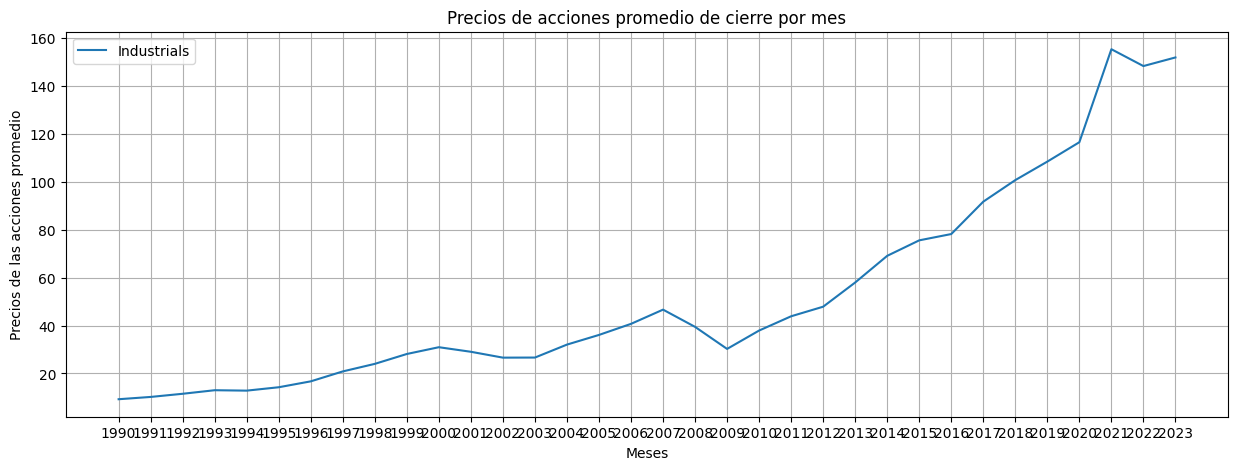

In [23]:
#Realizamos una vista general de los indicadores totales

# Definir las variables
x = data_close_promedio_anual.reset_index()['Date']
y1 = data_close_promedio_anual.mean(axis=1)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(x, y1, label='Industrials')
ax.set_title('Precios de acciones promedio de cierre por mes')
ax.set_xlabel('Meses')
ax.set_ylabel('Precios de las acciones promedio')
ax.legend()
ax.grid()

# Mostrar el gráfico
plt.show()

                >>>Opinión:<<<
                Las mejores inversiones se hicieron el 2020 y los mejores precios de venta están en el 2021. 

Análisis de Ratios de crecimiento

    Tasa de crecimiento anual compuesto

In [24]:
# Calcular la tasa de crecimiento anual compuesto
cagrs = []
for col in data_close_promedio_anual.columns:
    beginning_value = data_close_promedio_anual[col][0]
    ending_value = data_close_promedio_anual[col][len(data_close_promedio_anual)-1]
    num_years = len(data_close_promedio_anual)
    cagr = (ending_value / beginning_value) ** (1/num_years) - 1
    cagrs.append(cagr)

# Calcular el promedio para cada sector
avg_annual_returns = sum(cagrs) / len(cagrs)

# Imprimir los resultados
print('Average annual return for each sector:')
for i, col in enumerate(data_close_promedio_anual.columns):
    print(f'{col}: {cagrs[i]:.2%}')
print(f'Average: {avg_annual_returns:.2%}')


Average annual return for each sector:
Industrials: 9.47%
Health_Care: 10.63%
Information_Technology: 12.33%
Communication_Services: 7.44%
Consumer_Staples: 8.11%
Consumer_Discretionary: 12.79%
Utilities: 4.53%
Financials: 8.14%
Materials: 6.95%
Real_Estate: 6.80%
Energy: 6.70%
Average: 8.54%


                >>>Opinión:<<<
                Luego de estimar el retorno anual compuesto se obtiene que el mejor rendimiento anual es para la categoría:
                Consumer_Discretionary con 12.04% de crecimiento anual, seguido de Health_Care con 9.54%, Industrials con 8.11%,
                Materials con 7.51% y Information_Technology con 6.61%.

Variación del precio en el tiempo

In [25]:
# Calcular los ratios de crecimiento para cada columna del precio de cierre
Tasa_Crecimiento = data_close_promedio_anual.pct_change()*100

# Eliminar el primer año, ya que no hay datos anteriores para calcular la tasa de variación
Tasa_Crecimiento = Tasa_Crecimiento.dropna()

# Mostrar los ratios de crecimiento resultantes
Tasa_Crecimiento

,Industrials,Health_Care,Information_Technology,Communication_Services,Consumer_Staples,Consumer_Discretionary,Utilities,Financials,Materials,Real_Estate,Energy
Date,,,,,,,,,,,
1991,10.436242,23.624943,8.300967,6.944332,32.221836,24.087378,3.610060,18.109534,11.017532,-3.839462,-0.664607
1992,13.877810,-0.199254,18.060356,17.172348,9.408593,19.388777,12.954627,22.049738,12.308226,22.114834,-5.427877
1993,17.334756,-14.317574,31.608478,1.989607,-2.352450,22.165690,14.997562,25.216956,5.093045,23.247678,18.636577
1994,5.072610,5.841315,23.194240,-3.265746,3.921256,1.466321,-15.759213,-5.085464,8.169407,-5.345906,-5.421229
1995,13.036647,20.890007,46.566464,8.401385,15.037986,-6.314338,6.553446,17.949780,11.583961,-1.226938,8.007284
1996,28.951597,27.114021,8.840617,14.682405,21.887923,15.597977,6.566902,27.953739,11.601354,7.876269,25.543996
1997,28.231754,23.914176,30.144723,13.903794,29.510248,14.955160,5.231579,48.977784,10.564288,23.280620,37.229900
1998,7.299738,27.058811,-0.359721,42.601135,18.087095,28.837741,25.098107,32.716829,0.634741,-5.204006,-6.748014
1999,9.891992,4.992738,80.078409,36.188571,6.009985,93.328142,-7.521832,18.977183,1.857028,-6.855441,-1.250308


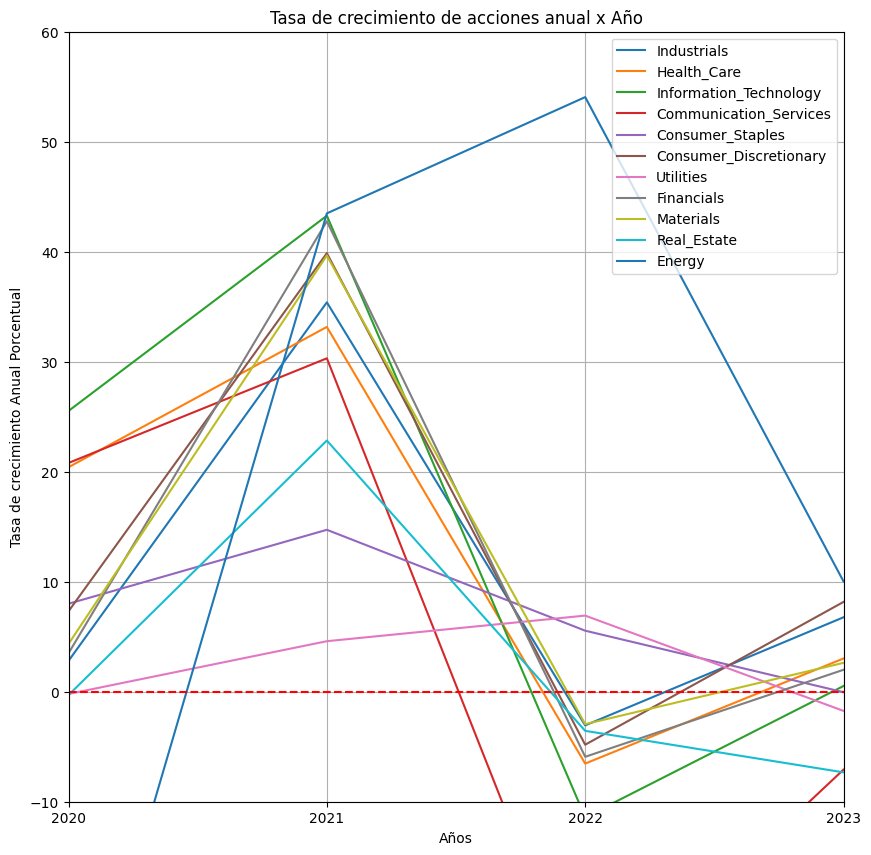

In [45]:
# Definir las variables X e Y para la variación de precios
x = Tasa_Crecimiento.reset_index()['Date']
y1 = Tasa_Crecimiento['Industrials']
y2 = Tasa_Crecimiento['Health_Care']
y3 = Tasa_Crecimiento['Information_Technology']
y4 = Tasa_Crecimiento['Communication_Services']
y5 = Tasa_Crecimiento['Consumer_Staples']
y6 = Tasa_Crecimiento['Consumer_Discretionary']
y7 = Tasa_Crecimiento['Utilities']
y8 = Tasa_Crecimiento['Financials']
y9 = Tasa_Crecimiento['Materials']
y10 = Tasa_Crecimiento['Real_Estate']
y11 = Tasa_Crecimiento['Energy']


# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x, y1, label='Industrials')
ax.plot(x, y2, label='Health_Care')
ax.plot(x, y3, label='Information_Technology')
ax.plot(x, y4, label='Communication_Services')
ax.plot(x, y5, label='Consumer_Staples')
ax.plot(x, y6, label='Consumer_Discretionary')
ax.plot(x, y7, label='Utilities')
ax.plot(x, y8, label='Financials')
ax.plot(x, y9, label='Materials')
ax.plot(x, y10, label='Real_Estate')
ax.plot(x, y11, label='Energy')

#Personalizar vista
ax.set_title('Tasa de crecimiento de acciones anual x Año')
ax.set_xlabel('Años')
ax.set_ylabel('Tasa de crecimiento Anual Porcentual')
ax.legend()
ax.grid()
ax.axvline(x=21, color='red', linestyle=':', label='x=5')
ax.axhline(y=0, color='red', linestyle='--', label='x=5')
ax.set_xlim(29, 32)
ax.set_ylim(-10, 60)

# Mostrar el gráfico
plt.show()

                >>>Opinión:<<<
                Los 4 sectores ganadores en lo que va del 2023 y el 2022 son:
                Information_Technology con 5.5%, Consumer_Discretionary con 5.0%, Communication_Services con 4.9% e Industrials con 4.0%.

    En resumen:
    Las 4 industrias con mejor comportamiento a partir del 2000 son: 
        Consumer_Discretionary: 12.04%
        Health_Care: 9.54%
        Industrials: 8.06%
        Materials: 7.51%
    A continuación mostramos los 4 sectores ganadores en lo que va del 2023 y el 2022
        Information_Technology 5.5%
        Consumer_Discretionary 5.0%
        Communication_Services 4.9%
        Industrials 4.0%
    Selección de Sector:
        **Consumer_Discretionary**

        4.2. Selección de 5 empresas con mejor rendimiento

In [27]:
# Extraer la data desde el sector Consumer_Discretionary y todos las empresas asociadas
CD_Close_anio_mes = data_close.groupby(data_close['Date'].dt.strftime('%Y')).mean()     # Agrupar la data por año
Data_Sector_CD=CD_Close_anio_mes[Consumer_Discretionary["Symbol"]]                      # Extraer información según la lista de "Symbol" para el sector
Data_Sector_CD.head(1)                                                                  # Visualizamos la data

C:\Users\user\AppData\Local\Temp\ipykernel_19056\3249391569.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CD_Close_anio_mes = data_close.groupby(data_close['Date'].dt.strftime('%Y')).mean()     # Agrupar la data por año


,AAP,AMZN,APTV,AZO,BBWI,BBY,BKNG,BWA,CZR,KMX,...,TPR,TGT,TSLA,TJX,TSCO,ULTA,VFC,WHR,WYNN,YUM
Date,,,,,,,,,,,,,,,,,,,,,
1990,NaN,NaN,NaN,NaN,7.395994,0.307678,NaN,NaN,NaN,NaN,...,NaN,5.226573,NaN,0.41837,NaN,NaN,2.881209,26.612154,NaN,NaN


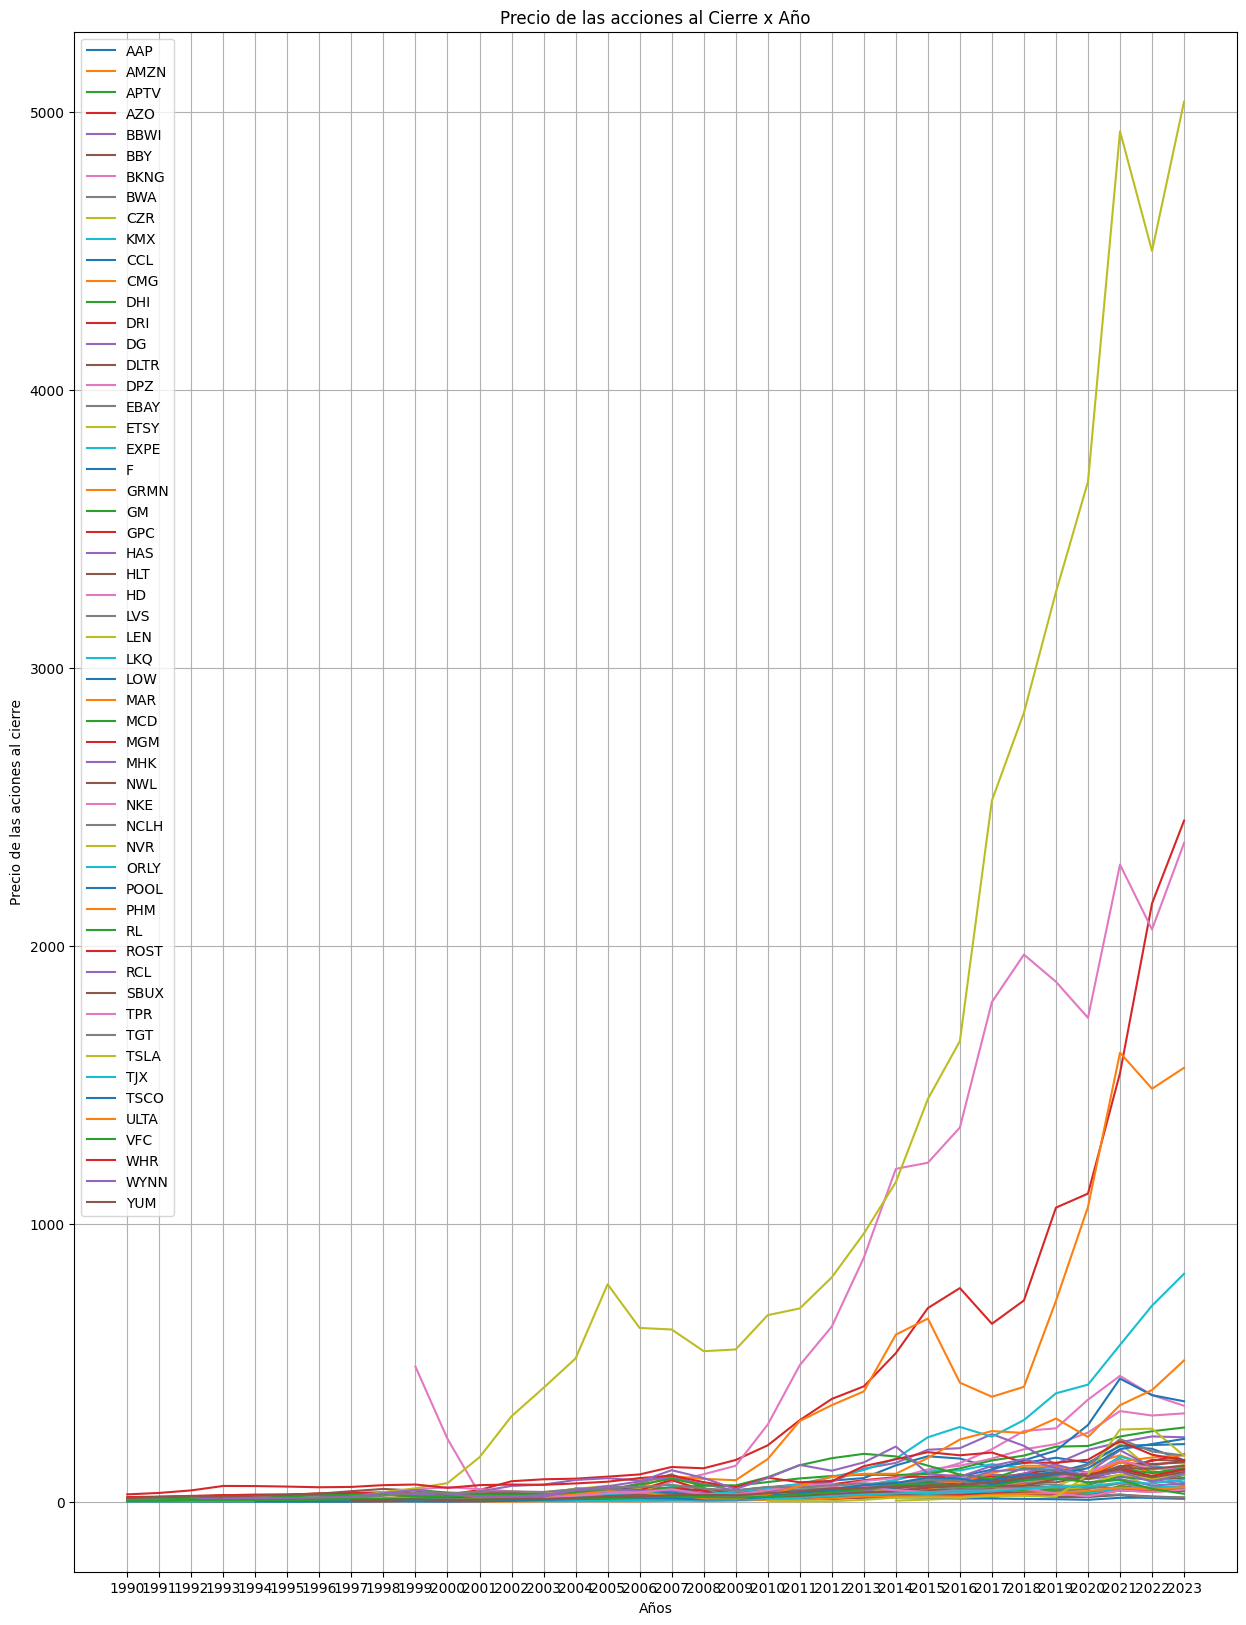

In [28]:
# Definir las variables X e Y para todas empresas en el sector Consumer_Discretionary
x = Data_Sector_CD.reset_index()['Date']
y1 = Data_Sector_CD['AAP']
y2 = Data_Sector_CD[ 'AMZN']
y3 = Data_Sector_CD[ 'APTV']
y4 = Data_Sector_CD[ 'AZO']
y5 = Data_Sector_CD[ 'BBWI']
y6 = Data_Sector_CD[ 'BBY']
y7 = Data_Sector_CD[ 'BKNG']
y8 = Data_Sector_CD[ 'BWA']
y9 = Data_Sector_CD[ 'CZR']
y10 = Data_Sector_CD['KMX']
y11 = Data_Sector_CD[ 'CCL']
y12 = Data_Sector_CD[ 'CMG']
y13 = Data_Sector_CD[ 'DHI']
y14 = Data_Sector_CD[ 'DRI']
y15 = Data_Sector_CD[ 'DG']
y16 = Data_Sector_CD[ 'DLTR']
y17 = Data_Sector_CD[ 'DPZ']
y18 = Data_Sector_CD[ 'EBAY']
y19 = Data_Sector_CD[ 'ETSY']
y20 = Data_Sector_CD['EXPE']
y21 = Data_Sector_CD[ 'F']
y22 = Data_Sector_CD[ 'GRMN']
y23 = Data_Sector_CD[ 'GM']
y24 = Data_Sector_CD[ 'GPC']
y25 = Data_Sector_CD[ 'HAS']
y26 = Data_Sector_CD[ 'HLT']
y27 = Data_Sector_CD[ 'HD']
y28 = Data_Sector_CD[ 'LVS']
y29 = Data_Sector_CD[ 'LEN']
y30 = Data_Sector_CD['LKQ']
y31 = Data_Sector_CD[ 'LOW']
y32 = Data_Sector_CD[ 'MAR']
y33 = Data_Sector_CD[ 'MCD']
y34 = Data_Sector_CD[ 'MGM']
y35 = Data_Sector_CD[ 'MHK']
y36 = Data_Sector_CD[ 'NWL']
y37 = Data_Sector_CD[ 'NKE']
y38 = Data_Sector_CD[ 'NCLH']
y39 = Data_Sector_CD[ 'NVR']
y40 = Data_Sector_CD['ORLY']
y41 = Data_Sector_CD[ 'POOL']
y42 = Data_Sector_CD[ 'PHM']
y43 = Data_Sector_CD[ 'RL']
y44 = Data_Sector_CD[ 'ROST']
y45 = Data_Sector_CD[ 'RCL']
y46 = Data_Sector_CD[ 'SBUX']
y47 = Data_Sector_CD[ 'TPR']
y48 = Data_Sector_CD[ 'TGT']
y49 = Data_Sector_CD['TSLA']
y50 = Data_Sector_CD[ 'TJX']
y51 = Data_Sector_CD[ 'TSCO']
y52 = Data_Sector_CD[ 'ULTA']
y53 = Data_Sector_CD[ 'VFC']
y54 = Data_Sector_CD[ 'WHR']
y55 = Data_Sector_CD[ 'WYNN']
y56 = Data_Sector_CD[ 'YUM']


# Crear el gráfico
fig, ax = plt.subplots(figsize=(15, 20))
ax.plot(x, y1, label='AAP')
ax.plot(x, y2, label= 'AMZN')
ax.plot(x, y3, label= 'APTV')
ax.plot(x, y4, label= 'AZO')
ax.plot(x, y5, label= 'BBWI')
ax.plot(x, y6, label= 'BBY')
ax.plot(x, y7, label= 'BKNG')
ax.plot(x, y8, label= 'BWA')
ax.plot(x, y9, label= 'CZR')
ax.plot(x, y10, label='KMX')
ax.plot(x, y11, label= 'CCL')
ax.plot(x, y12, label= 'CMG')
ax.plot(x, y13, label= 'DHI')
ax.plot(x, y14, label= 'DRI')
ax.plot(x, y15, label= 'DG')
ax.plot(x, y16, label= 'DLTR')
ax.plot(x, y17, label= 'DPZ')
ax.plot(x, y18, label= 'EBAY')
ax.plot(x, y19, label= 'ETSY')
ax.plot(x, y20, label='EXPE')
ax.plot(x, y21, label= 'F')
ax.plot(x, y22, label= 'GRMN')
ax.plot(x, y23, label= 'GM')
ax.plot(x, y24, label= 'GPC')
ax.plot(x, y25, label= 'HAS')
ax.plot(x, y26, label= 'HLT')
ax.plot(x, y27, label= 'HD')
ax.plot(x, y28, label= 'LVS')
ax.plot(x, y29, label= 'LEN')
ax.plot(x, y30, label='LKQ')
ax.plot(x, y31, label= 'LOW')
ax.plot(x, y32, label= 'MAR')
ax.plot(x, y33, label= 'MCD')
ax.plot(x, y34, label= 'MGM')
ax.plot(x, y35, label= 'MHK')
ax.plot(x, y36, label= 'NWL')
ax.plot(x, y37, label= 'NKE')
ax.plot(x, y38, label= 'NCLH')
ax.plot(x, y39, label= 'NVR')
ax.plot(x, y40, label='ORLY')
ax.plot(x, y41, label= 'POOL')
ax.plot(x, y42, label= 'PHM')
ax.plot(x, y43, label= 'RL')
ax.plot(x, y44, label= 'ROST')
ax.plot(x, y45, label= 'RCL')
ax.plot(x, y46, label= 'SBUX')
ax.plot(x, y47, label= 'TPR')
ax.plot(x, y48, label= 'TGT')
ax.plot(x, y49, label='TSLA')
ax.plot(x, y50, label= 'TJX')
ax.plot(x, y51, label= 'TSCO')
ax.plot(x, y52, label= 'ULTA')
ax.plot(x, y53, label= 'VFC')
ax.plot(x, y54, label= 'WHR')
ax.plot(x, y55, label= 'WYNN')
ax.plot(x, y56, label= 'YUM')

ax.set_title('Precio de las acciones al Cierre x Año')
ax.set_xlabel('Años')
ax.set_ylabel('Precio de las aciones al cierre')
ax.legend()
ax.grid()

# Mostrar el gráfico
plt.show()

                >>>Opinión:<<<
                El gráfico nos permite visualizar el comportamiento anual de las empresas pertenecientes al sector Consumer_Discretionary.
                A simple vista hay varias empresas que su pendiente es muy inclidada hace varios años y promete rentabilidad más estable.

In [29]:
Data_Sector_CD.head(4)      # Visualizamos la información

,AAP,AMZN,APTV,AZO,BBWI,BBY,BKNG,BWA,CZR,KMX,...,TPR,TGT,TSLA,TJX,TSCO,ULTA,VFC,WHR,WYNN,YUM
Date,,,,,,,,,,,,,,,,,,,,,
1990,NaN,NaN,NaN,NaN,7.395994,0.307678,NaN,NaN,NaN,NaN,...,NaN,5.226573,NaN,0.418370,NaN,NaN,2.881209,26.612154,NaN,NaN
1991,NaN,NaN,NaN,10.260962,10.427181,0.682129,NaN,NaN,NaN,NaN,...,NaN,5.729249,NaN,0.510376,NaN,NaN,3.524618,31.791502,NaN,NaN
1992,NaN,NaN,NaN,16.978346,9.802628,0.857138,NaN,NaN,NaN,NaN,...,NaN,5.613517,NaN,0.638257,NaN,NaN,5.485212,40.899606,NaN,NaN
1993,NaN,NaN,NaN,23.358449,9.095425,1.930601,NaN,3.110172,NaN,NaN,...,NaN,5.963645,NaN,0.937608,NaN,NaN,5.539749,56.934783,NaN,NaN


In [30]:
# Estimamos la media móvil de 3 años móviles
Data_Sector_CD_MM3=Data_Sector_CD.rolling(window=3).mean()          # Definimos la función rolling para devolver el promedio móvil
print(Data_Sector_CD.shape, " Sin Media Móvil")                     # Visualizamos las dimensiones del nuevo dataframe
print(Data_Sector_CD_MM3.shape, " Media Móvil")                     # Visualizamos las dimensiones del nuevo dataframe

(34, 56)  Sin Media Móvil
(34, 56)  Media Móvil


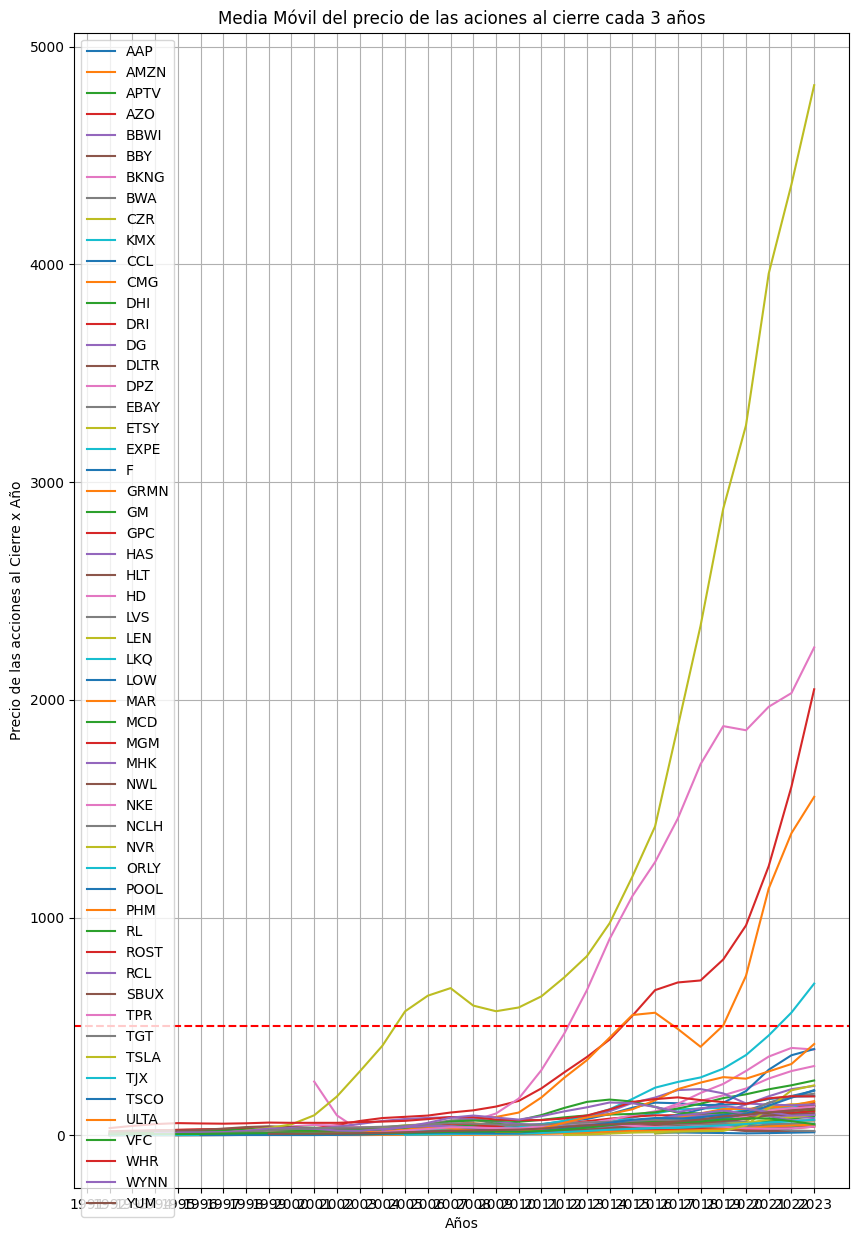

In [48]:
# Definir las variables para est nuevo gráfico
x =  Data_Sector_CD_MM3.reset_index()['Date']
y1 =  Data_Sector_CD_MM3['AAP']
y2 =  Data_Sector_CD_MM3[ 'AMZN']
y3 =  Data_Sector_CD_MM3[ 'APTV']
y4 =  Data_Sector_CD_MM3[ 'AZO']
y5 =  Data_Sector_CD_MM3[ 'BBWI']
y6 =  Data_Sector_CD_MM3[ 'BBY']
y7 =  Data_Sector_CD_MM3[ 'BKNG']
y8 =  Data_Sector_CD_MM3[ 'BWA']
y9 =  Data_Sector_CD_MM3[ 'CZR']
y10 =  Data_Sector_CD_MM3['KMX']
y11 =  Data_Sector_CD_MM3[ 'CCL']
y12 =  Data_Sector_CD_MM3[ 'CMG']
y13 =  Data_Sector_CD_MM3[ 'DHI']
y14 =  Data_Sector_CD_MM3[ 'DRI']
y15 =  Data_Sector_CD_MM3[ 'DG']
y16 =  Data_Sector_CD_MM3[ 'DLTR']
y17 =  Data_Sector_CD_MM3[ 'DPZ']
y18 =  Data_Sector_CD_MM3[ 'EBAY']
y19 =  Data_Sector_CD_MM3[ 'ETSY']
y20 =  Data_Sector_CD_MM3['EXPE']
y21 =  Data_Sector_CD_MM3[ 'F']
y22 =  Data_Sector_CD_MM3[ 'GRMN']
y23 =  Data_Sector_CD_MM3[ 'GM']
y24 =  Data_Sector_CD_MM3[ 'GPC']
y25 =  Data_Sector_CD_MM3[ 'HAS']
y26 =  Data_Sector_CD_MM3[ 'HLT']
y27 =  Data_Sector_CD_MM3[ 'HD']
y28 =  Data_Sector_CD_MM3[ 'LVS']
y29 =  Data_Sector_CD_MM3[ 'LEN']
y30 =  Data_Sector_CD_MM3['LKQ']
y31 =  Data_Sector_CD_MM3[ 'LOW']
y32 =  Data_Sector_CD_MM3[ 'MAR']
y33 =  Data_Sector_CD_MM3[ 'MCD']
y34 =  Data_Sector_CD_MM3[ 'MGM']
y35 =  Data_Sector_CD_MM3[ 'MHK']
y36 =  Data_Sector_CD_MM3[ 'NWL']
y37 =  Data_Sector_CD_MM3[ 'NKE']
y38 =  Data_Sector_CD_MM3[ 'NCLH']
y39 =  Data_Sector_CD_MM3[ 'NVR']
y40 =  Data_Sector_CD_MM3['ORLY']
y41 =  Data_Sector_CD_MM3[ 'POOL']
y42 =  Data_Sector_CD_MM3[ 'PHM']
y43 =  Data_Sector_CD_MM3[ 'RL']
y44 =  Data_Sector_CD_MM3[ 'ROST']
y45 =  Data_Sector_CD_MM3[ 'RCL']
y46 =  Data_Sector_CD_MM3[ 'SBUX']
y47 =  Data_Sector_CD_MM3[ 'TPR']
y48 =  Data_Sector_CD_MM3[ 'TGT']
y49 =  Data_Sector_CD_MM3['TSLA']
y50 =  Data_Sector_CD_MM3[ 'TJX']
y51 =  Data_Sector_CD_MM3[ 'TSCO']
y52 =  Data_Sector_CD_MM3[ 'ULTA']
y53 =  Data_Sector_CD_MM3[ 'VFC']
y54 =  Data_Sector_CD_MM3[ 'WHR']
y55 =  Data_Sector_CD_MM3[ 'WYNN']
y56 =  Data_Sector_CD_MM3[ 'YUM']


# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 15))
ax.plot(x, y1, label='AAP')
ax.plot(x, y2, label= 'AMZN')
ax.plot(x, y3, label= 'APTV')
ax.plot(x, y4, label= 'AZO')
ax.plot(x, y5, label= 'BBWI')
ax.plot(x, y6, label= 'BBY')
ax.plot(x, y7, label= 'BKNG')
ax.plot(x, y8, label= 'BWA')
ax.plot(x, y9, label= 'CZR')
ax.plot(x, y10, label='KMX')
ax.plot(x, y11, label= 'CCL')
ax.plot(x, y12, label= 'CMG')
ax.plot(x, y13, label= 'DHI')
ax.plot(x, y14, label= 'DRI')
ax.plot(x, y15, label= 'DG')
ax.plot(x, y16, label= 'DLTR')
ax.plot(x, y17, label= 'DPZ')
ax.plot(x, y18, label= 'EBAY')
ax.plot(x, y19, label= 'ETSY')
ax.plot(x, y20, label='EXPE')
ax.plot(x, y21, label= 'F')
ax.plot(x, y22, label= 'GRMN')
ax.plot(x, y23, label= 'GM')
ax.plot(x, y24, label= 'GPC')
ax.plot(x, y25, label= 'HAS')
ax.plot(x, y26, label= 'HLT')
ax.plot(x, y27, label= 'HD')
ax.plot(x, y28, label= 'LVS')
ax.plot(x, y29, label= 'LEN')
ax.plot(x, y30, label='LKQ')
ax.plot(x, y31, label= 'LOW')
ax.plot(x, y32, label= 'MAR')
ax.plot(x, y33, label= 'MCD')
ax.plot(x, y34, label= 'MGM')
ax.plot(x, y35, label= 'MHK')
ax.plot(x, y36, label= 'NWL')
ax.plot(x, y37, label= 'NKE')
ax.plot(x, y38, label= 'NCLH')
ax.plot(x, y39, label= 'NVR')
ax.plot(x, y40, label='ORLY')
ax.plot(x, y41, label= 'POOL')
ax.plot(x, y42, label= 'PHM')
ax.plot(x, y43, label= 'RL')
ax.plot(x, y44, label= 'ROST')
ax.plot(x, y45, label= 'RCL')
ax.plot(x, y46, label= 'SBUX')
ax.plot(x, y47, label= 'TPR')
ax.plot(x, y48, label= 'TGT')
ax.plot(x, y49, label='TSLA')
ax.plot(x, y50, label= 'TJX')
ax.plot(x, y51, label= 'TSCO')
ax.plot(x, y52, label= 'ULTA')
ax.plot(x, y53, label= 'VFC')
ax.plot(x, y54, label= 'WHR')
ax.plot(x, y55, label= 'WYNN')
ax.plot(x, y56, label= 'YUM')

# Personalizar las variables
ax.set_title('Media Móvil del precio de las aciones al cierre cada 3 años')
ax.set_xlabel('Años')
ax.set_ylabel('Precio de las acciones al Cierre x Año')
ax.legend()
ax.grid()

# Graficar una línea divisoria para las acciones de mejor rendimiento
ax.axhline(y=500, color='red', linestyle='--', label='x=5')

# Mostrar el gráfico
plt.show()

                >>>Opinión:<<<
                La media móvil de 3 años nos permite ver la tendencia del mercado amortizando las oscilaciones diarias de la acción. En este punto reslta el comportamiento de 5 empresas una más nueva que las otras 4. La lista oficial es AZO, BKNG, CMG, NVR y ORLY. La empresa más nueva es CMG y el precio de la acción en más económico.

Selección de 5 empresas

In [32]:
#Filtramos los valores de las acciones con media móvil mayores a 500
df_filtrado = Data_Sector_CD_MM3.loc[:, Data_Sector_CD_MM3.iloc[33] > 500]
df_filtrado.head(20)

,AZO,BKNG,CMG,NVR,ORLY
Date,,,,,
1990,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,1.355859,NaN
1993,16.865919,NaN,NaN,1.543029,NaN
1994,22.079444,NaN,NaN,3.576795,NaN
1995,25.034909,NaN,NaN,5.927647,3.322407
1996,27.187736,NaN,NaN,8.338475,3.743935
1997,27.335429,NaN,NaN,11.864080,4.317283
1998,28.761024,NaN,NaN,20.903101,5.955294


In [33]:
#Accedemos a la data orifinal
Acciones = pdr.get_data_yahoo('AZO,BKNG,CMG,NVR,ORLY', start="2000-01-01", end=hoy)     # Descargamos el DataFrame
Acciones_aux=Acciones.copy()                                                            # Generamos una copia del dataframe con las 5 empresas
Acciones_aux.columns = Acciones_aux.columns.swaplevel(0, 1)                             # Invertimos el orden de las cabeceras multi-nivel

[*********************100%***********************]  5 of 5 completed


    5. ANÁLISIS EXPLORATORIO

                >>>Opinión:<<<
                Con el fin de encontrar alguna relación entre variables se analizará la empresa AZO para encontrar anomalías.

In [34]:
#Exploramos la primera empresa AZO
Acciones_AZO=pd.DataFrame(Acciones_aux.loc[:,'AZO'])                    # Filtramos la Data por empresa
Acciones_AZO                                                            # Visualizamos

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2000-01-03,30.562500,30.562500,32.500000,30.500000,32.125000,441000
2000-01-04,30.437500,30.437500,30.937500,30.312500,30.500000,490600
2000-01-05,30.312500,30.312500,30.437500,29.875000,30.312500,577400
2000-01-06,29.062500,29.062500,29.937500,28.937500,29.750000,489600
2000-01-07,30.437500,30.437500,31.125000,29.062500,29.062500,472100
...,...,...,...,...,...,...
2023-02-21,2573.139893,2573.139893,2605.229980,2562.439941,2590.639893,166200
2023-02-22,2567.360107,2567.360107,2581.919922,2556.580078,2572.639893,176900
2023-02-23,2571.459961,2571.459961,2575.290039,2538.479980,2555.280029,106000


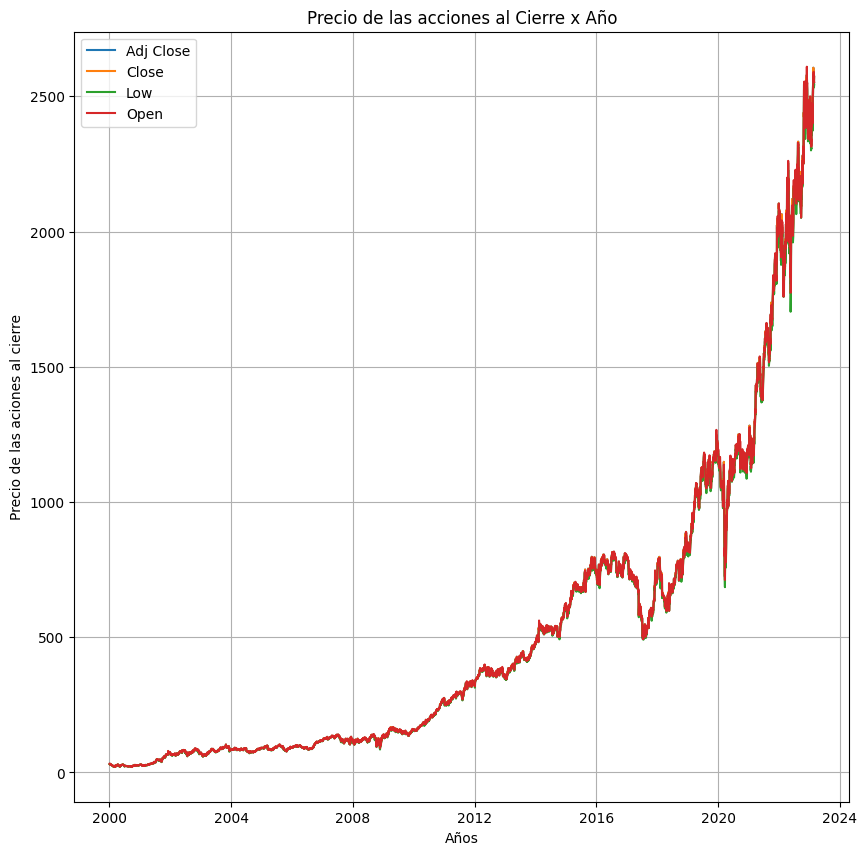

In [35]:
# Datos de ejemplo
x =  Acciones_AZO.reset_index()['Date']
y1 =  Acciones_AZO['Adj Close']
y2 =  Acciones_AZO[ 'Close']
y3 =  Acciones_AZO[ 'Low']
y4 =  Acciones_AZO[ 'Open']



# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x, y1, label='Adj Close')
ax.plot(x, y2, label= 'Close')
ax.plot(x, y3, label= 'Low')
ax.plot(x, y4, label= 'Open')

#Prsonalizamos las variables
ax.set_title('Precio de las acciones al Cierre x Año')
ax.set_xlabel('Años')
ax.set_ylabel('Precio de las aciones al cierre')
ax.legend()
ax.grid()

# Mostrar el gráfico
plt.show()

                >>>Opinión:<<<
                La acción AZO ha tenido picos considerables en los últimos años, empezando por 2016, luego 2020 en adelante.

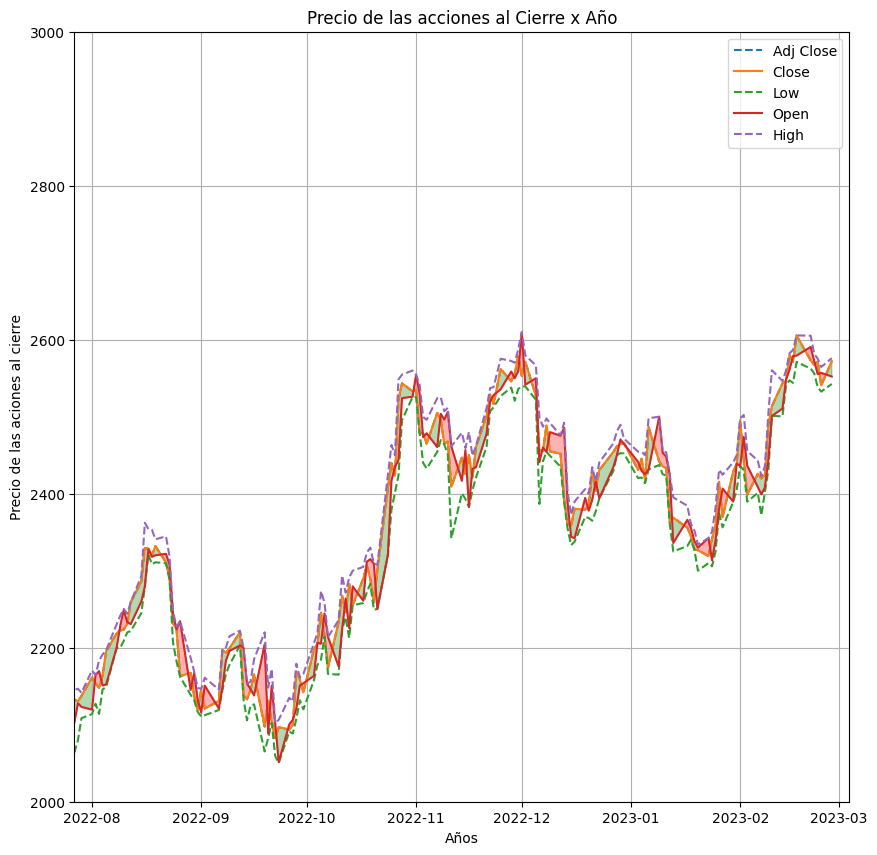

In [49]:
# Datos de ejemplo
x =  Acciones_AZO.reset_index()['Date']
y1 =  Acciones_AZO['Adj Close']
y2 =  Acciones_AZO[ 'Close']
y3 =  Acciones_AZO[ 'Low']
y4 =  Acciones_AZO[ 'Open']
y5 =  Acciones_AZO[ 'High']

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x, y1, linestyle='--', label='Adj Close')
ax.plot(x, y2, label= 'Close')
ax.plot(x, y3, linestyle='--', label= 'Low')
ax.plot(x, y4, label= 'Open')
ax.plot(x, y5, linestyle='--', label= 'High')

# Personalizar el Gráfico
ax.set_title('Precio de las acciones al Cierre x Año')
ax.set_xlabel('Años')
ax.set_ylabel('Precio de las aciones al cierre')
ax.legend()
ax.grid()
ax.axhline(y=500, color='red', linestyle='--', label='x=5')

# Rellenar el área entre las dos líneas
ax.fill_between(x, y2, y4, where=(y2 > y4), interpolate=True, color='green', alpha=0.3)
ax.fill_between(x, y2, y4, where=(y2 < y4), interpolate=True, color='red', alpha=0.3)
ax.set_xlim(19200, 19420)
ax.set_ylim(2000, 3000)

# Mostrar el gráfico
plt.show()

                >>>Opinión:<<<
                Un gráfico sombreado nos permite ver los mágenes de precios por mes. Estas variaciones han sido muy pequeñas, pero como es habitua en la bolsa de valores se puede invertir a corto plazo, ejemplo semanal, o a mediano plazo, ejemplo anual. Con rangos mensuales o anuales los periodos son más notables.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigne

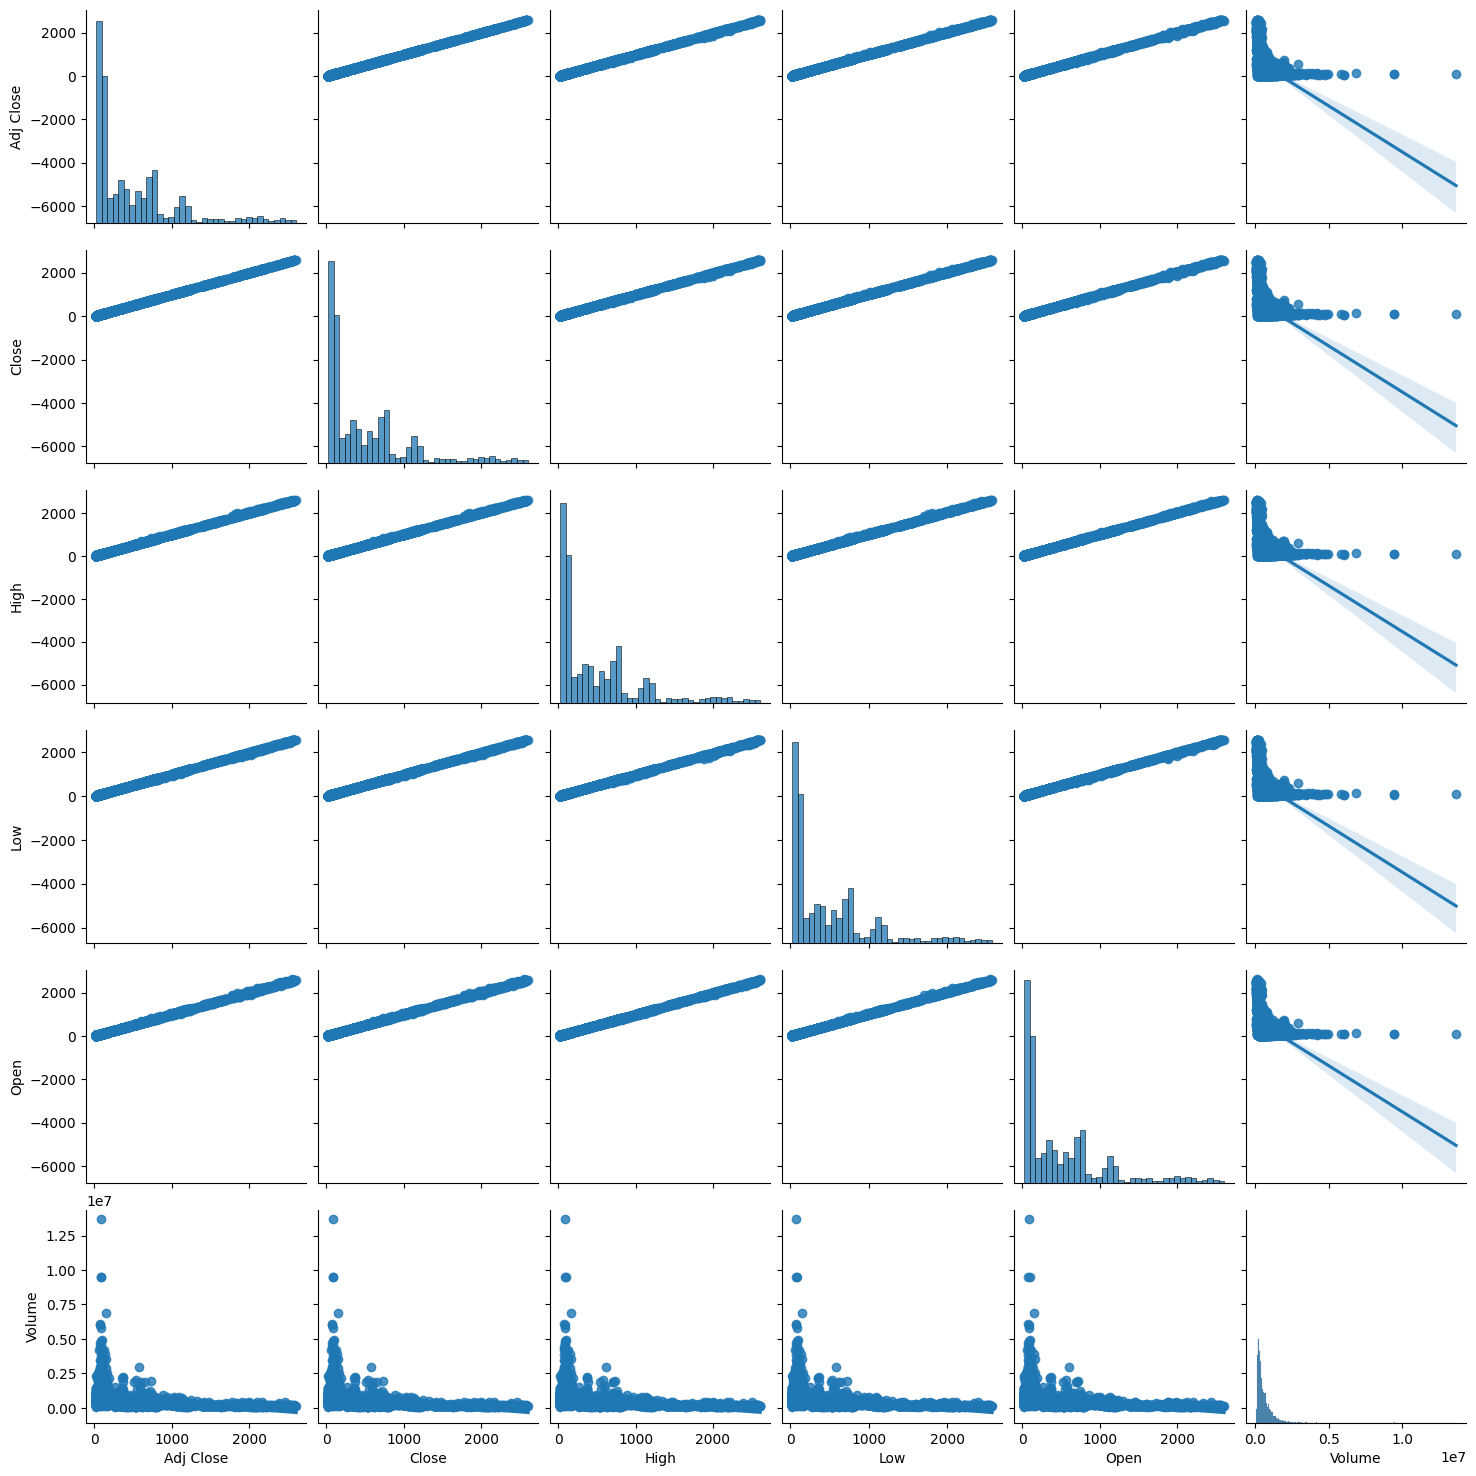

In [37]:
# Análisis de Regresión lineal con PairPlot
sns.pairplot(data=Acciones_AZO,                 # Designamos la fuente
             palette='colorblind',              # Asignamos la paleta de colores
             kind='reg',                        # Asignar el tipo de indicador
            )

                >>>Opinión:<<<
                Existen valores súper altos en la variable volumen para la empresa AZO,
                sin embargo las otras variables tienen un comportamiento normal.

        5.1. Comportamiento Estadístico

In [38]:
# Calcular los ratios de crecimiento para cada columna
Acciones_AZO_crecimiento = Acciones_AZO.pct_change()*100

# Eliminar el primer año, ya que no hay datos anteriores para calcular la tasa de variación
Acciones_AZO_crecimiento = Acciones_AZO_crecimiento.dropna()

# Mostrar los ratios de crecimiento resultantes
Acciones_AZO_crecimiento

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2000-01-04,-0.408998,-0.408998,-4.807692,-0.614754,-5.058366,11.247166
2000-01-05,-0.410678,-0.410678,-1.616162,-1.443299,-0.614754,17.692621
2000-01-06,-4.123711,-4.123711,-1.642710,-3.138075,-1.855670,-15.206096
2000-01-07,4.731183,4.731183,3.966597,0.431965,-2.310924,-3.574346
2000-01-10,0.821355,0.821355,1.606426,5.161290,8.387097,-24.782885
...,...,...,...,...,...,...
2023-02-21,-1.246545,-1.246545,-0.014973,-0.338757,0.440428,26.195900
2023-02-22,-0.224620,-0.224620,-0.894741,-0.228683,-0.694809,6.438026
2023-02-23,0.159691,0.159691,-0.256781,-0.707981,-0.674788,-40.079141


Text(0.5, 0.98, 'Comparación de distribuciones de tasas de crecimiento diario')

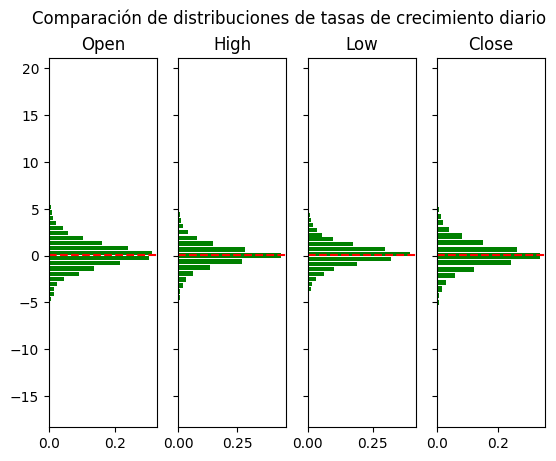

In [39]:
# crear subplots con sharey=True
fig, axs = plt.subplots(1, 4, sharey=True)

# crear histogramas en cada subplot
axs[0].hist(Acciones_AZO_crecimiento["Open"], bins=50,density=True,orientation='horizontal', color='green',rwidth=0.8)
axs[1].hist(Acciones_AZO_crecimiento["High"], bins=50,density=True,orientation='horizontal', color='green',rwidth=0.8)
axs[2].hist(Acciones_AZO_crecimiento["Low"], bins=50,density=True,orientation='horizontal', color='green',rwidth=0.8)
axs[3].hist(Acciones_AZO_crecimiento["Close"], bins=50,density=True,orientation='horizontal', color='green',rwidth=0.8)

# agregar títulos a los subplots
axs[0].set_title('Open')
axs[1].set_title('High')
axs[2].set_title('Low')
axs[3].set_title('Close')

# Graficar las medias
axs[0].axhline(y=Acciones_AZO_crecimiento["Open"].mean(), color='red', linestyle='--', label='x=5')
axs[1].axhline(y=Acciones_AZO_crecimiento["High"].mean(), color='red', linestyle='--', label='x=5')
axs[2].axhline(y=Acciones_AZO_crecimiento["Low"].mean(), color='red', linestyle='--', label='x=5')
axs[3].axhline(y=Acciones_AZO_crecimiento["Close"].mean(), color='red', linestyle='--', label='x=5')

# agregar un título general a la figura
fig.suptitle('Comparación de distribuciones de tasas de crecimiento diario')

                >>>Opinión:<<<
                Visualizar este gráfico es súper importante, debido a que permite entender el sistema de acciones está en equilibrio.
                Unos ganan para que otros pierdan, pese a que suene a cliché, la media de las variaciones todas las variables
                para una empresa están en 0. En este sentido, es importantísimo establecer plazos para trabajar el capital.
                Mientras más corto el tiempo de inversión más propenso a las fluctuaciones está el inversionista. En resumen, se recomendarán
                4 empresas que tienen más de 20 años en el mercado de valores, una media móvil ascendente en los próximos años.
                La inversión debe realizarse en más de una empresa para reducir riesgos y deben considerarse los ratios
                y variables presentados en el dashboard de power BI.

    6. EXPORTAR DATA

In [40]:
# Exportamos los precios en csv
Acciones["Close"].to_csv('Acciones_Close.csv', index=True)      # Exportamos los precios Close
Acciones["Open"].to_csv('Acciones_Open.csv', index=True)        # Exportamos los precios Open
Acciones["High"].to_csv('Acciones_High.csv', index=True)        # Exportamos los precios High
Acciones["Low"].to_csv('Acciones_Low.csv', index=True)          # Exportamos los precios Low
Acciones["Volume"].to_csv('Acciones_Volume.csv', index=True)    # Exportamos los precios Volume

In [41]:
# Exportamos las variaciones del precio
variacion_Close = Acciones['Close'].pct_change()              # Estimados las variaciones La tabla de Close
variacion_Close.to_csv('variacion_Close.csv', index=True)     # Exportamos las variaciones